In [2]:
import pandas as pd
import os
import json
from bs4 import BeautifulSoup

def count_words(text):
    return len(text.split())

def html_to_text(html_content):
    soup = BeautifulSoup(html_content, 'html5lib') # for malformed html
    text = soup.get_text(separator=' ')
    text = text.strip()
    return text

def process_entry(entry):
    question_text = entry.get("question_text", "")
    example_id = entry.get("example_id", "")
    document_text = entry.get("document_text", "")
    annotations = entry.get("annotations", [])
    
    long_answers = []
    long_answers_cleaned = []
    short_answers = set()
    
    for annotation in annotations:
        long_answer = annotation.get("long_answer", {}).get("text", "")
        if long_answer:
            long_answers.append(long_answer)
            long_answers_cleaned.append(html_to_text(long_answer))
        
        for short_answer in annotation.get("short_answers", []):
            short_answers.add(short_answer.get("text", ""))
    
    return {
        "ExampleId": example_id,
        "QuestionText": question_text,
        "DocumentText": document_text,
        "LongAnswers": long_answers,
        "LongAnswersCleaned": long_answers_cleaned,
        "ShortAnswers": list(short_answers)
    }

try:
    print('Trying to load data')
    df = pd.read_csv('../data/google-natural-questions/google-natural-questions-structured.csv')
    print('Data already processed')
except:
    print('Data not processed yet')
    data_dir = '../data/google-natural-questions/'
    file_names = ['simplified-nq-dev.jsonl', 'simplified-nq-train.jsonl']
    data_list = []
    for file_name in file_names:
        file_path = os.path.join(data_dir, file_name)
        with open(file_path, 'r') as f:
            for line in f:
                entry = json.loads(line.strip())
                data_list.append(process_entry(entry))

    df = pd.DataFrame(data_list)
    df.to_csv('../data/google-natural-questions/google-natural-questions-structured.csv', index=False)

df

Trying to load data
Data already processed


,ExampleId,QuestionText,DocumentText,LongAnswers,LongAnswersCleaned,ShortAnswers,QuestionLength,NumContexts,ContextLength,LongAnswerLength,LongAnswerCleanedLength,ShortAnswerCount
0,-6570496346595660652,what are the main crops grown in the united st...,Agriculture in the United States - wikipedia <...,['<Table> <Tr> <Th> Major Crops in the USA </T...,['Major Crops in the USA 1997 ( in US $ bi...,"['Rice', 'Cotton', 'Wheat', 'Tobacco', 'Soybea...",10,46,12329,1000,366,11
1,7811140318762480311,who is the owner of the mandalay bay in vegas,Mandalay Bay - wikipedia <H1> Mandalay Bay </H...,"[""<P> Mandalay Bay is a 43 - story luxury reso...","[""Mandalay Bay is a 43 - story luxury resort a...",['MGM Resorts International'],10,23,6561,532,426,1
2,-472523896331012000,which of the following was not one of the func...,Freedmen 's Bureau - wikipedia <H1> Freedmen '...,[],[],[],14,47,12050,0,0,0
3,5159516459824335717,get back get back you don't know me like that ...,Get Back ( Ludacris song ) - Wikipedia <H1> Ge...,[],[],[],11,6,2618,0,0,0
4,4111902318448915849,who was the first nominated lady for rajya sabha,List of nominated members of Rajya Sabha - wik...,['<Table> <Tr> <Th> No . </Th> <Th> Name </Th>...,['No . Name Field Affiliation ...,[],9,3,3039,380,196,0
...,...,...,...,...,...,...,...,...,...,...,...,...
315198,-4860763920664935992,when does sam malone get his bar back,Sam Malone - Wikipedia <H1> Sam Malone </H1> J...,[],[],[],8,31,7219,0,0,0
315199,5733276129126234955,who has been eliminated on big brother 17,Big Brother 19 ( U.S. ) - wikipedia <H1> Big B...,[],[],[],8,41,18817,0,0,0
315200,-2176841346641996646,whoop whoop that's the sound of da police,Sound of da police - wikipedia <H1> Sound of d...,[],[],[],8,4,1500,0,0,0
315201,5821082858248975115,whats the difference between mexican and spani...,Chorizo - wikipedia <H1> Chorizo </H1> Jump to...,[],[],[],8,35,5913,0,0,0


In [13]:
num_questions = df.shape[0]

df['QuestionLength'] = df['QuestionText'].apply(count_words)
avg_question_length = df['QuestionLength'].mean()
std_question_length = df['QuestionLength'].std()

df['NumContexts'] = df['DocumentText'].apply(lambda x: x.count('<P>'))
num_contexts = df['NumContexts'].sum()

df['ContextLength'] = df['DocumentText'].apply(count_words)
avg_context_length = df['ContextLength'].mean()
std_context_length = df['ContextLength'].std()

df['LongAnswerLength'] = df['LongAnswers'].apply(lambda x: sum(count_words(answer) for answer in x))
df['LongAnswerCleanedLength'] = df['LongAnswersCleaned'].apply(lambda x: sum(count_words(answer) for answer in x))
df['ShortAnswerCount'] = df['ShortAnswers'].apply(len)

avg_answer_length = df['LongAnswerLength'].mean()
std_answer_length = df['LongAnswerLength'].std()

avg_answer_cleaned_length = df['LongAnswerCleanedLength'].mean()
std_answer_cleaned_length = df['LongAnswerCleanedLength'].std()

avg_short_answer_count = df['ShortAnswerCount'].mean()
std_short_answer_count = df['ShortAnswerCount'].std()


print(f"Number of questions: {num_questions}")
print(f"Average question length: {avg_question_length:.2f} words")
print(f"Standard deviation of question length: {std_question_length:.2f} words")
print(f"Number of contexts (facts): {num_contexts}")
print(f"Average context length: {avg_context_length:.2f} words")
print(f"Standard deviation of context length: {std_context_length:.2f} words")
print(f"Average long answer length: {avg_answer_length:.2f} words")
print(f"Standard deviation of long answer length: {std_answer_length:.2f} words")
print(f"Average cleaned long answer length: {avg_answer_cleaned_length:.2f} words")
print(f"Standard deviation of cleaned long answer length: {std_answer_cleaned_length:.2f} words")
print(f"Average number of short answers: {avg_short_answer_count:.2f}")
print(f"Standard deviation of number of short answers: {std_short_answer_count:.2f}")

Number of questions: 315203
Average question length: 9.24 words
Standard deviation of question length: 1.83 words
Number of contexts (facts): 11266272
Average context length: 8992.81 words
Standard deviation of context length: 8245.76 words
Average long answer length: 211.79 words
Standard deviation of long answer length: 1323.04 words
Average cleaned long answer length: 149.02 words
Standard deviation of cleaned long answer length: 886.10 words
Average number of short answers: 0.44
Standard deviation of number of short answers: 0.82


In [4]:
import nltk
from collections import Counter
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm

nltk.download('punkt')

data_dir = './data/google-natural-questions/'
file_names = ['simplified-nq-dev.jsonl', 'simplified-nq-train.jsonl']
data_list = []

def get_top_ngrams(questions, n, top_k=32):
    ngram_counter = Counter()
    for question in questions:
        tokens = nltk.word_tokenize(question.lower())
        ngram_counter.update(ngrams(tokens, n))
    return ngram_counter.most_common(top_k)

questions = df['QuestionText'].tolist()

df_ngram = pd.DataFrame(columns=[f'rank-{i+1}' for i in range(32)], index=[f'{i+1}-gram' for i in range(8)])

for n in tqdm(range(1, 9), desc="Processing n-grams"):
    top_ngrams = get_top_ngrams(questions, n)
    for rank, (ngram, freq) in enumerate(top_ngrams):
        ngram_str = ' '.join(ngram)
        df_ngram.at[f'{n}-gram', f'rank-{rank+1}'] = (ngram_str, freq)
    print(f"Top {n}-grams: {top_ngrams[:5]}")
    df_ngram.to_csv('top_ngrams.csv', index=True)

[nltk_data] Downloading package punkt to
[nltk_data]     /home/yuehengzhang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Processing n-grams:   0%|          | 0/8 [00:00<?, ?it/s]

Top 1-grams: [(('the',), 271294), (('of',), 122904), (('in',), 106430), (('who',), 83850), (('is',), 71817)]
Top 2-grams: [(('of', 'the'), 36972), (('is', 'the'), 35333), (('in', 'the'), 34060), (('what', 'is'), 20726), (('was', 'the'), 17003)]
Top 3-grams: [(('what', 'is', 'the'), 16677), (('when', 'did', 'the'), 7157), (('who', 'is', 'the'), 6918), (('when', 'was', 'the'), 6744), (('where', 'does', 'the'), 5145)]
Top 4-grams: [(('which', 'of', 'the', 'following'), 3582), (('when', 'was', 'the', 'last'), 2953), (('was', 'the', 'last', 'time'), 2547), (('in', 'the', 'united', 'states'), 1792), (('of', 'the', 'following', 'is'), 1427)]
Top 5-grams: [(('when', 'was', 'the', 'last', 'time'), 2542), (('what', 'is', 'the', 'meaning', 'of'), 1339), (('which', 'of', 'the', 'following', 'is'), 1333), (('what', 'is', 'the', 'name', 'of'), 1139), (('what', 'is', 'the', 'difference', 'between'), 1133)]
Top 6-grams: [(('when', 'was', 'the', 'last', 'time', 'the'), 859), (('what', 'is', 'the', 'nam

/tmp/ipykernel_2821687/3794144559.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ngram_labels, rotation=45, ha='right')
/tmp/ipykernel_2821687/3794144559.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ngram_labels, rotation=45, ha='right')
/tmp/ipykernel_2821687/3794144559.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ngram_labels, rotation=45, ha='right')
/tmp/ipykernel_2821687/3794144559.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ngram_labels, rotation=45, ha='right')
/tmp/ipykernel_2821687/3794144559.py:32: UserWarning: set_ticklabels() should on

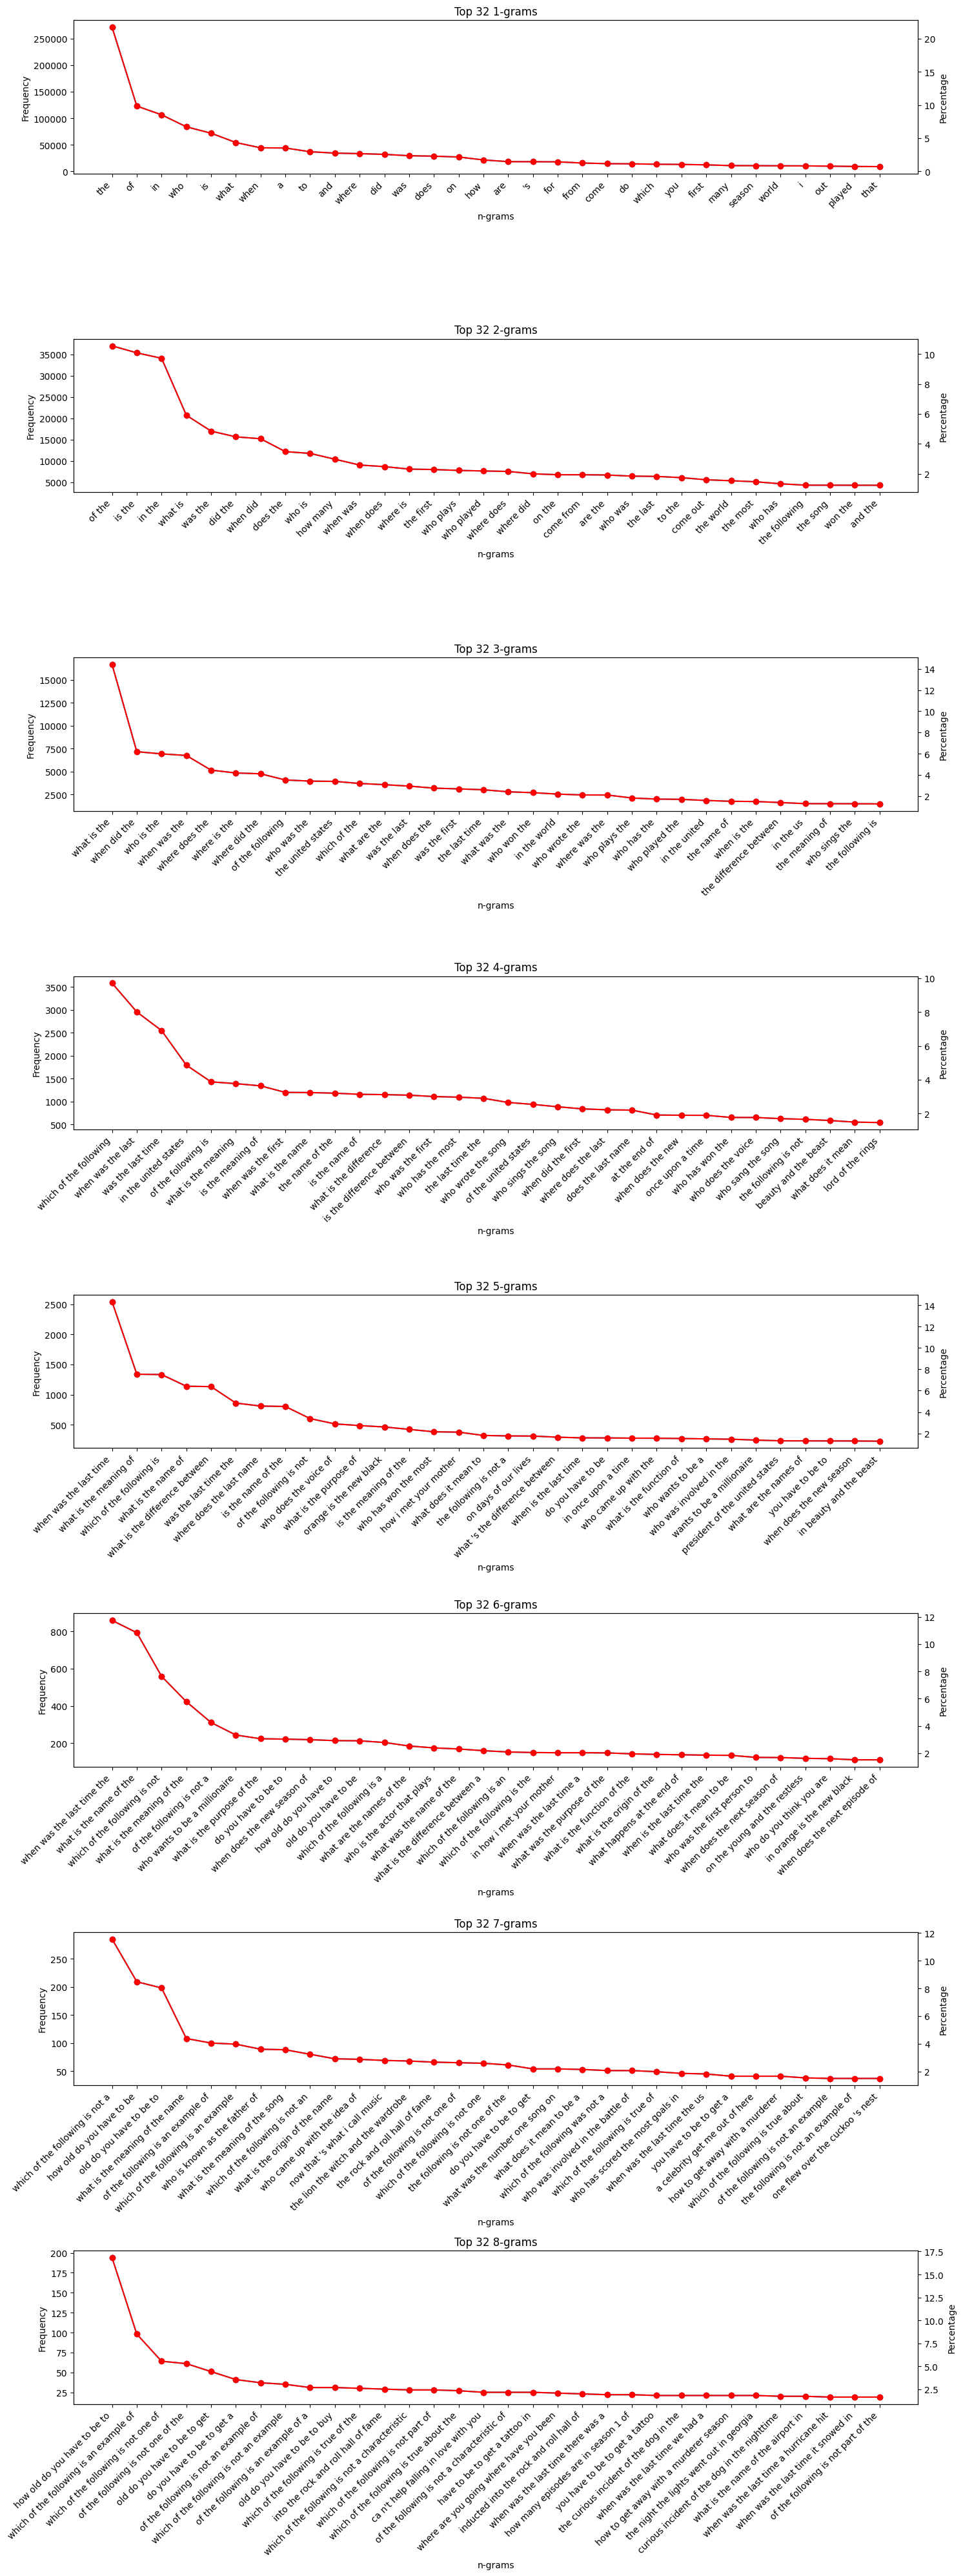

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df_ngram = pd.read_csv('top_ngrams.csv', index_col=0)
def parse_ngram_freq(cell):
    if isinstance(cell, str):
        ngram, freq = eval(cell)
        return ngram, freq
    return None, 0

fig, axs = plt.subplots(8, 1, figsize=(15, 40))

for i in range(8):
    n = i + 1
    ngram_labels = []
    frequencies = []
    
    for col in df_ngram.columns:
        ngram, freq = parse_ngram_freq(df_ngram.at[f'{n}-gram', col])
        if ngram:
            ngram_labels.append(ngram)
            frequencies.append(freq)

    total_freq = sum(frequencies)
    ratios = [freq / total_freq * 100 for freq in frequencies]
    
    ax1 = axs[i]
    ax1.plot(ngram_labels, frequencies, marker='o', label='Frequency')
    ax1.set_title(f'Top 32 {n}-grams')
    ax1.set_xlabel('n-grams')
    ax1.set_ylabel('Frequency')
    ax1.set_xticklabels(ngram_labels, rotation=45, ha='right')
    
    ax2 = ax1.twinx()
    ax2.plot(ngram_labels, ratios, marker='o', color='r', label='Percentage')
    ax2.set_ylabel('Percentage')

plt.tight_layout()
plt.show()